In [54]:
import pandas as pd
from fastai.text.all import *


In [3]:
df1 = pd.read_csv('../../data/qa_dataset/S08_question_answer_pairs.txt', sep='\t')
df2 = pd.read_csv('../../data/qa_dataset/S09_question_answer_pairs.txt', sep='\t')
df3 = pd.read_csv('../../data/qa_dataset/S10_question_answer_pairs.txt', sep='\t', encoding = 'ISO-8859-1')

In [58]:
full_df = df1.append([df2, df3])

In [6]:
full_df.head()

,ArticleTitle,Question,Answer,DifficultyFromQuestioner,DifficultyFromAnswerer,ArticleFile
0,Abraham_Lincoln,Was Abraham Lincoln the sixteenth President of...,yes,easy,easy,S08_set3_a4
1,Abraham_Lincoln,Was Abraham Lincoln the sixteenth President of...,Yes.,easy,easy,S08_set3_a4
2,Abraham_Lincoln,Did Lincoln sign the National Banking Act of 1...,yes,easy,medium,S08_set3_a4
3,Abraham_Lincoln,Did Lincoln sign the National Banking Act of 1...,Yes.,easy,easy,S08_set3_a4
4,Abraham_Lincoln,Did his mother die of pneumonia?,no,easy,medium,S08_set3_a4


In [10]:
full_df.shape

(3998, 6)

In [5]:
full_df = df.drop_duplicates(subset='Question')

In [21]:
full_df.shape

(2457, 6)

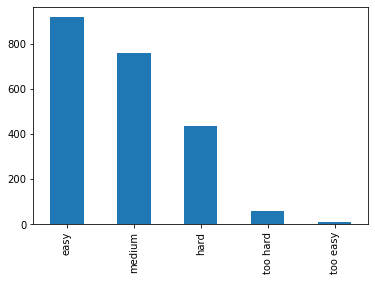

In [6]:
full_df.DifficultyFromAnswerer.value_counts().plot.bar()

In [7]:
easy_df = full_df[full_df.DifficultyFromAnswerer=="easy"]

In [8]:
easy_df.shape

(917, 6)

In [24]:
easy_df.head()

,ArticleTitle,Question,Answer,DifficultyFromQuestioner,DifficultyFromAnswerer,ArticleFile
0,Abraham_Lincoln,Was Abraham Lincoln the sixteenth President of...,yes,easy,easy,S08_set3_a4
6,Abraham_Lincoln,How many long was Lincoln's formal education?,18 months,medium,easy,S08_set3_a4
8,Abraham_Lincoln,When did Lincoln begin his political career?,1832,medium,easy,S08_set3_a4
10,Abraham_Lincoln,What did The Legal Tender Act of 1862 establish?,"the United States Note, the first paper curren...",medium,easy,S08_set3_a4
18,Abraham_Lincoln,Was Abraham Lincoln the first President of the...,No,easy,easy,S08_set3_a4


,ArticleTitle,Question,Answer,DifficultyFromQuestioner,DifficultyFromAnswerer,ArticleFile
6,Abraham_Lincoln,How many long was Lincoln's formal education?,18 months,medium,easy,S08_set3_a4


In [49]:
def get_article(df_row):
    file_name = df_row['ArticleFile'].values[0]
    file_path = "../../data/qa_dataset/text_data/" + file_name + ".txt.clean"
    #print(file_path)
    with open(file_path, 'r') as file:
        data = file.read().replace('\n', '')
        #print(data)
        return data

In [41]:
my_row = easy_df[easy_df.index==6]
article_text = get_article(my_row)

ation of December 8, 1863, offered pardons to those who had not held a Confederate civil office, had not mistreated Union prisoners, and would sign an oath of allegiance.  /ref> Critical decisions had to be made as state after state was reconquered. Of special importance were Tennessee, where Lincoln appointed Andrew Johnson as governor, and Louisiana, where Lincoln attempted a plan that would restore statehood when 10 percent of the voters agreed to it. The Radicals thought this policy too lenient, and passed their own plan, the Wade-Davis Bill, in 1864. When Lincoln pocket-vetoed the bill, the Radicals retaliated by refusing to seat representatives elected from Louisiana, Arkansas, and Tennessee.  Donald (1995) ch. 20On April 9, 1865, Lee surrendered at Appomattox Court House in Virginia, and the war was effectively over. The other rebel armies surrendered soon after, and there was no subsequent guerrilla warfare. Lincoln went to Richmond to make a public gesture of sitting at Jeffer

In [95]:
def get_items(df_row):
    #article_text = get_article(df_row)
    question_text = df_row['Question'].values[0]
    return question_text#[question_text, article_text]

In [51]:
my_row = easy_df[easy_df.index==6]
my_text = get_items(my_row)
print(my_text[0])

How many long was Lincoln's formal education?


In [96]:
def get_y(df_row):
    return df_row['Answer'].values[0]

In [59]:
df = easy_df

In [83]:
db_clas = DataBlock(
    blocks=(TextBlock.from_df('Question'), TextBlock.from_df('Answer')),
    get_x=ColReader('Question'), 
    get_y=ColReader('Answer'), 
    splitter=ColSplitter()
)

In [97]:
dls_lm = DataBlock(
    blocks=(TextBlock.from_df('Question'), TextBlock.from_df('Answer')),
    get_y=get_y,
    get_items=get_items, 
    splitter=RandomSplitter(0.1)
)

In [98]:
dls_clas = dls_lm.dataloaders(df, bs=16)

IndexError: list index out of range

In [68]:
dls_clas.show_batch(max_n=2)

AttributeError: 'DataBlock' object has no attribute 'show_batch'